In [29]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [141]:
G=nx.read_edgelist('bio-celegans.txt', nodetype=int)

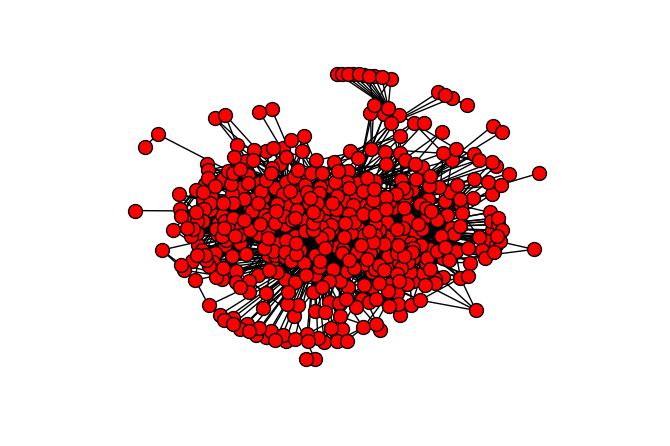

In [148]:
pos=nx.spring_layout(G,iterations=100)
nx.draw(G,pos,node_size=100)#,with_labels=True)

In [142]:
nodeNumber = nx.number_of_nodes(G)
print(nx.nodes(G))
print(nx.all_neighbors(G, 1))
print(nodeNumber)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

## Model 1

In [144]:
inf = []
susc = []
numberSteps = 1000000
thresholdInf = 0.8
thresholdSusc = 0.1

cur_infected_node = random.randint(1, nx.number_of_nodes(G))

for i in range(numberSteps):
    print("Current infected: ", cur_infected_node)
    if cur_infected_node not in inf:
        inf.append(cur_infected_node)
    print("All infected nodes: ", inf)
    
    not_infected_neighbors = []
    for i in list(nx.all_neighbors(G, cur_infected_node)):
        if i not in inf:
            not_infected_neighbors.append(i)
    if not not_infected_neighbors:
        print("Exit")
        break
        
    print("All neighbors of {}: ".format(cur_infected_node), list(nx.all_neighbors(G, cur_infected_node)))
    
    p = random.uniform(0, 1)
    print(p)
    if 1-p > threshold:
        inf.remove(cur_infected_node)
    print(1-p, inf)
    if p > threshold:
        cur_infected_node = random.choice(not_infected_neighbors)
    
    print("Next infected: ", cur_infected_node)
    print("-------------------------------")
print("All infected nodes: ", inf)

Current infected:  93
All infected nodes:  [93]
All neighbors of 93:  [145, 147, 440, 443, 412, 301, 303]
0.7682259095586167
0.2317740904413833 []
Next infected:  303
-------------------------------
Current infected:  303
All infected nodes:  [303]
All neighbors of 303:  [145, 426, 147, 93, 438]
0.9896073475078625
0.0103926524921375 [303]
Next infected:  426
-------------------------------
Current infected:  426
All infected nodes:  [303, 426]
All neighbors of 426:  [131, 278, 6, 135, 136, 407, 273, 146, 147, 366, 150, 151, 408, 281, 154, 155, 285, 414, 304, 163, 420, 390, 406, 295, 298, 299, 173, 175, 176, 53, 438, 55, 186, 196, 197, 198, 200, 73, 183, 204, 205, 335, 208, 303, 216, 346, 347, 349, 222, 351, 336, 101, 358, 233, 238, 243, 245, 246, 119, 413, 250, 124, 383]
0.3998011188893851
0.6001988811106149 [303]
Next infected:  298
-------------------------------
Current infected:  298
All infected nodes:  [303, 298]
All neighbors of 298:  [343, 267, 392, 394, 75, 77, 271, 401, 337, 

In [222]:
def getInfectedFraction(G, numberSteps, thresholdInf, thresholdSusc):
    inf = []
    susc = []
    
    cur_infected_node = random.randint(1, nx.number_of_nodes(G))
    
    for i in range(numberSteps):
        #print("Current infected: ", cur_infected_node)
        if cur_infected_node not in inf:
            inf.append(cur_infected_node)
        #print("All infected nodes: ", inf)
        
        not_infected_neighbors = []
        for i in list(nx.all_neighbors(G, cur_infected_node)):
            if i not in inf:
                not_infected_neighbors.append(i)
        if not not_infected_neighbors:
            #print("Exit")
            break
            
        #print("All neighbors of {}: ".format(cur_infected_node), list(nx.all_neighbors(G, cur_infected_node)))
        
        p = random.uniform(0, 1)
        #print(p)
        if 1-p > thresholdSusc:
            inf.remove(cur_infected_node)
        #print(1-p, inf)
        if p > thresholdInf:
            cur_infected_node = random.choice(not_infected_neighbors)
    
        #print("Next infected: ", cur_infected_node)
        #print("-------------------------------")
    return inf

In [271]:
infected = getInfectedFraction(G, 10000000, 0.99, 0.01)
print("Доля зараженных: ", len(infected) / nx.number_of_nodes(G))

Доля зараженных:  0.033112582781456956


In [278]:
prob = np.arange(0.01, 0.99, 0.02)
inf_arr = []
for p in prob:
    infected_arr = getInfectedFraction(G, 10000000000, p, 0.01)
    inf_arr.append(len(infected_arr) / nx.number_of_nodes(G))

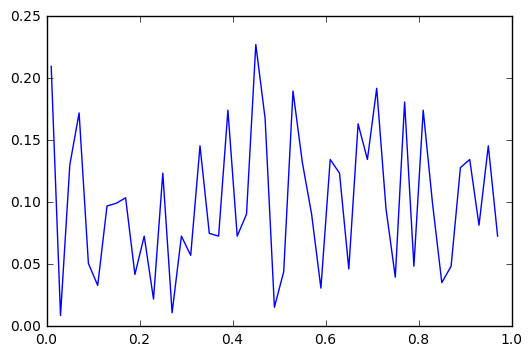

In [282]:
plt.plot(prob, inf_arr)